scratch working SVM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)

X_pos = np.random.randn(50, 2) + [2, 2]
y_pos = np.ones(50)

X_neg = np.random.randn(50, 2) + [-2, -2]
y_neg = -np.ones(50)


X = np.vstack((X_pos, X_neg))
y = np.hstack((y_pos, y_neg))

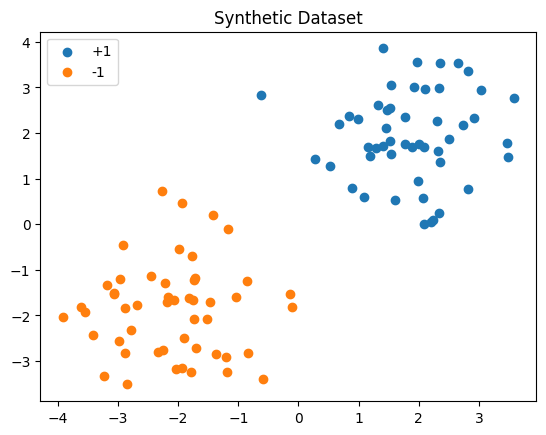

In [3]:
plt.scatter(X_pos[:,0], X_pos[:,1], label="+1")
plt.scatter(X_neg[:,0], X_neg[:,1], label="-1")
plt.legend()
plt.title("Synthetic Dataset")
plt.show()

Linear SVM From Scratch

In [4]:
class SVM:
    def __init__(self, lr=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = lr
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - y[idx] * x_i)
                    self.b -= self.lr * y[idx]

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

Train & Test the Model

In [5]:
svm = SVM()
svm.fit(X, y)

y_pred = svm.predict(X)

accuracy = np.mean(y_pred == y)
print("Accuracy:", accuracy)

Accuracy: 0.94


Visualize Decision Boundary

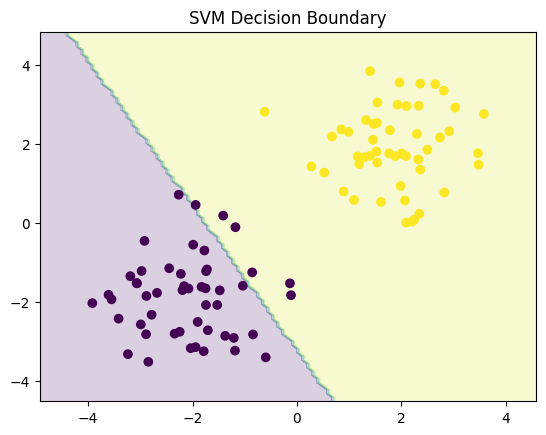

In [6]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.title("SVM Decision Boundary")
    plt.show()

plot_decision_boundary(X, y, svm)